In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from scipy import stats
%matplotlib inline

In [5]:
os.chdir(r'C:\Users\Fyodor\PycharmProjects\untitled\Coursera')
data = pd.read_csv('nhanes_2015_2016.csv')

### Quantitative bivariate data

scatterplot of arm length against leg length

<AxesSubplot:xlabel='BMXLEG', ylabel='BMXARML'>

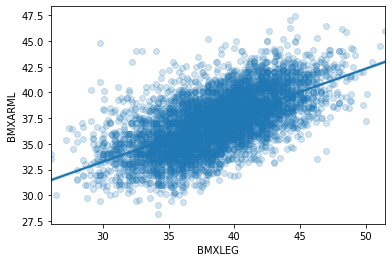

In [7]:
sns.regplot(x='BMXLEG', y='BMXARML', data=data, fit_reg=True, scatter_kws={'alpha': 0.2})
# - "overplotting" becomes an issue. This means that many points fall on top of each other in the plot,
# which obscures relationships in the middle of the distribution and over-emphasizes the extremes.
# One way to mitigate overplotting is to use an "alpha" channel to make the points semi-transparent,
# as we have done below.

### Density plot

c:\users\fyodor\pycharmprojects\data\venv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


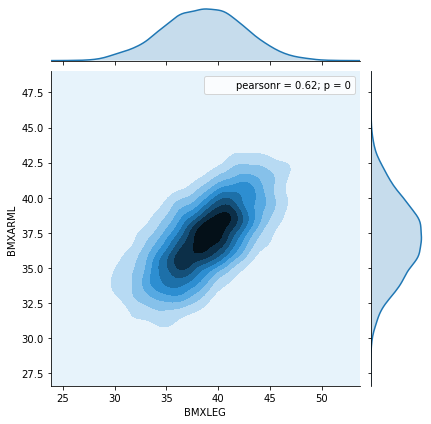

In [8]:
#ignore deprecation warning message
sns.jointplot(x='BMXLEG', y='BMXARML', kind='kde', data=data).annotate(stats.pearsonr)

c:\users\fyodor\pycharmprojects\data\venv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


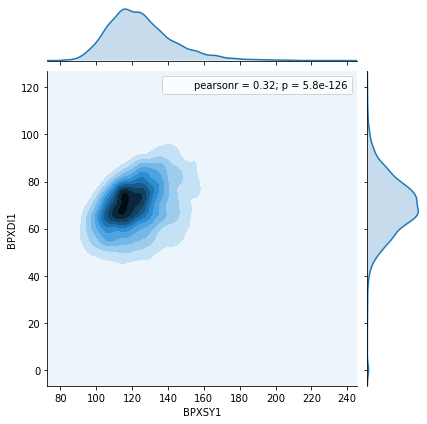

In [11]:
#ignore deprecation warning message
sns.jointplot(x='BPXSY1', y='BPXDI1', kind='kde', data=data).annotate(stats.pearsonr)


c:\users\fyodor\pycharmprojects\data\venv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


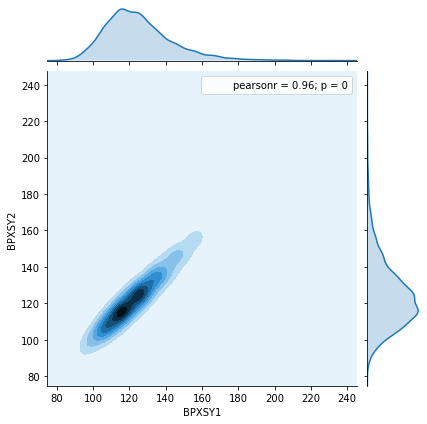

In [12]:
#ignore deprecation warning message
jp = sns.jointplot(x='BPXSY1', y='BPXSY2', kind='kde', data=data).annotate(stats.pearsonr)

### Heterogeneity and stratification


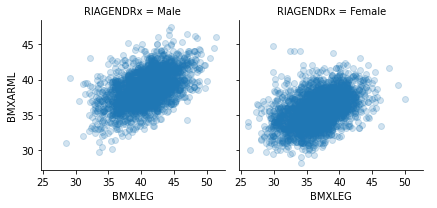

In [18]:
data['RIAGENDRx'] = data.RIAGENDR.replace({1: 'Male', 2: 'Female'})
sns.FacetGrid(data, col='RIAGENDRx').map(plt.scatter, 'BMXLEG', 'BMXARML', alpha=0.2).add_legend()



In [22]:
men_cor = data.loc[data.RIAGENDRx=='Male', ['BMXLEG', 'BMXARML']].dropna().corr()
women_cor = data.loc[data.RIAGENDRx=='Female', ['BMXLEG', 'BMXARML']].dropna().corr()

In [25]:
men_cor

,BMXLEG,BMXARML
BMXLEG,1.000000,0.505426
BMXARML,0.505426,1.000000


In [26]:
women_cor

,BMXLEG,BMXARML
BMXLEG,1.000000,0.434703
BMXARML,0.434703,1.000000


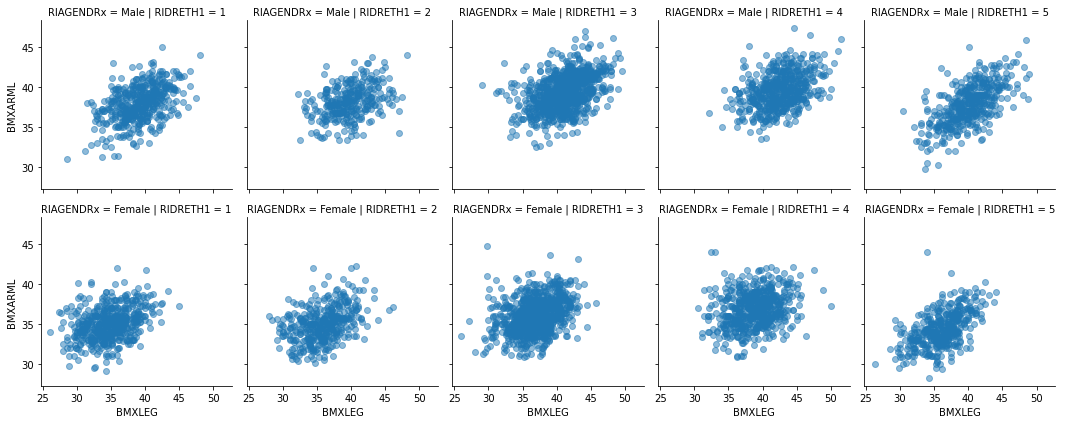

In [28]:
correlations = sns.FacetGrid(data, col='RIDRETH1', row='RIAGENDRx').map(plt.scatter,
                                                                        'BMXLEG',
                                                                        'BMXARML',
                                                                        alpha=0.5).add_legend()
plt.savefig('correlations within ethnicity and gender groups.png')

### Categorical bivariate data
First, we create new versions of these two variables using text labels instead of numbers to represent the categories.
We also create a new data set that omits people who responded "Don't know" or who refused to answer these questions.

In [31]:
data["DMDEDUC2x"] = data.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College",
                                       7: "Refused", 9: "Don't know"})
data["DMDMARTLx"] = data.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})
db = data.loc[(data.DMDEDUC2x != "Don't know") & (data.DMDMARTLx != "Refused"), :]

Now we can create a contingency table, counting the number of people in each cell defined by a combination
of education and marital status.

In [33]:
x = pd.crosstab(db.DMDEDUC2x, data.DMDMARTLx)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


The results will be easier to interpret if we normalize the data. A contingency table can be normalized in three ways -- we can make the rows sum to 1, the columns sum to 1, or the whole table sum to 1. Below we normalize within rows. This gives us the proportion of people in each educational attainment category who fall into each group of the marital status variable.

The modal (most common) marital status for people within each educational attainment group is "married". However quantitatively, the proportion of people who are married varies substantially, and is notably higher for college graduates (around 61%) compared to groups with lower educational attainment.

In [37]:
x.apply(lambda z: z / z.sum(), axis=1) # by rows

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


In [38]:
x.apply(lambda z: z / z.sum(), axis=0)  # by columns)



DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.107266,0.151803,0.109712,0.116534,0.209677,0.101523
<9,0.089965,0.125237,0.122662,0.064741,0.231183,0.223350
College,0.207612,0.161290,0.297482,0.251992,0.118280,0.149746
HS/GED,0.219723,0.252372,0.197842,0.236056,0.215054,0.251269
Some college/AA,0.375433,0.309298,0.272302,0.330677,0.225806,0.274112


It is quite plausible that there are gender differences in the relationship between educational attainment and marital status. Therefore we can look at the proportion of people in each marital status category, for each combination of the gender and education variables. This analyses yields some interesting trends, notably that women are much more likely to be widowed or divorced than men (e.g. women in the HS/GED group are around 3 times more likely to be widowed than men in the HS/GED group).

In [41]:
# The following line does these steps, reading the code from left to right:
# 1 Group the data by every combination of gender, education, and marital status
# 2 Count the number of people in each cell using the 'size' method
# 3 Pivot the marital status results into the columns (using unstack)
# 4 Fill any empty cells with 0
# 5 Normalize the data by row
db.groupby(['RIAGENDRx', 'DMDEDUC2x', 'DMDMARTLx']).size().unstack().fillna(0).apply(lambda x: x / x.sum(), axis=1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

In [42]:
dx = db.loc[(db.RIDAGEYR >= 40) & (db.RIDAGEYR < 50)]
a = dx.groupby(['RIAGENDRx', 'DMDEDUC2x', 'DMDMARTLx']).size().unstack().fillna(0).\
    apply(lambda x: x / x.sum(), axis=1)

dx = db.loc[(db.RIDAGEYR >= 50) & (db.RIDAGEYR < 60)]
b = dx.groupby(['RIAGENDRx', 'DMDEDUC2x', 'DMDMARTLx']).size().unstack().fillna(0).\
    apply(lambda x: x / x.sum(), axis=1)

In [46]:
a

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.090909          0.072727  0.581818   
          <9               0.089286          0.142857  0.464286   
          College          0.121019          0.019108  0.713376   
          HS/GED           0.151163          0.127907  0.476744   
          Some college/AA  0.184713          0.082803  0.509554   
Male      9-11             0.092593          0.129630  0.574074   
          <9               0.023810          0.142857  0.714286   
          College          0.051724          0.034483  0.879310   
          HS/GED           0.093023          0.081395  0.616279   
          Some college/AA  0.125000          0.125000  0.625000   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.163636   0.090909  0.000000  
          <9                    0.142857   0.125000  0.035714  
          College               0.108280   0.012739  0.025478  
          HS/GED                0.116279   0.104651  0.023256  
          Some college/AA       0.152866   0.057325  0.012739  
Male      9-11                  0.166667   0.037037  0.000000  
          <9                    0.095238   0.000000  0.023810  
          College               0.034483   0.000000  0.000000  
          HS/GED                0.162791   0.046512  0.000000  
          Some college/AA       0.096154   0.019231  0.009615

In [45]:
b

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.075472          0.169811  0.490566   
          <9               0.200000          0.066667  0.511111   
          College          0.180180          0.018018  0.648649   
          HS/GED           0.155340          0.067961  0.563107   
          Some college/AA  0.230216          0.050360  0.496403   
Male      9-11             0.151515          0.075758  0.666667   
          <9               0.056604          0.094340  0.622642   
          College          0.080808          0.050505  0.737374   
          HS/GED           0.156863          0.078431  0.637255   
          Some college/AA  0.188034          0.059829  0.555556   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.132075   0.075472  0.056604  
          <9                    0.044444   0.111111  0.066667  
          College               0.081081   0.045045  0.027027  
          HS/GED                0.058252   0.048544  0.106796  
          Some college/AA       0.107914   0.064748  0.050360  
Male      9-11                  0.075758   0.015152  0.015152  
          <9                    0.132075   0.056604  0.037736  
          College               0.121212   0.010101  0.000000  
          HS/GED                0.088235   0.029412  0.009804  
          Some college/AA       0.136752   0.034188  0.025641

In [58]:
a.loc[:, ["Married"]].unstack()


DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.581818  0.464286  0.713376  0.476744        0.509554
Male       0.574074  0.714286  0.879310  0.616279        0.625000

In [59]:
b.loc[:, ['Married']].unstack()

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.490566  0.511111  0.648649  0.563107        0.496403
Male       0.666667  0.622642  0.737374  0.637255        0.555556

### Mixed categorical and quantitative data
Specifically, we consider the distribution of ages for people who are currently in each marital status category.  A natural tool in this setting is side-by-side boxplots.  Here we see some unsurprising things -- widowed people tend to be older, and never-married people tend to be younger.

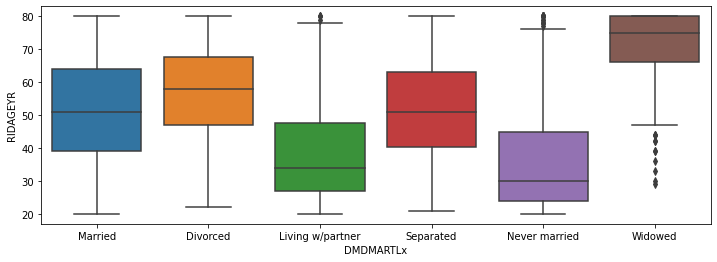

In [60]:
plt.figure(figsize=(12,4))
a = sns.boxplot(db.DMDMARTLx, db.RIDAGEYR)

When we have enough data, a "violinplot" gives a bit more insight into the shapes of the distributions compared to a traditional boxplot.


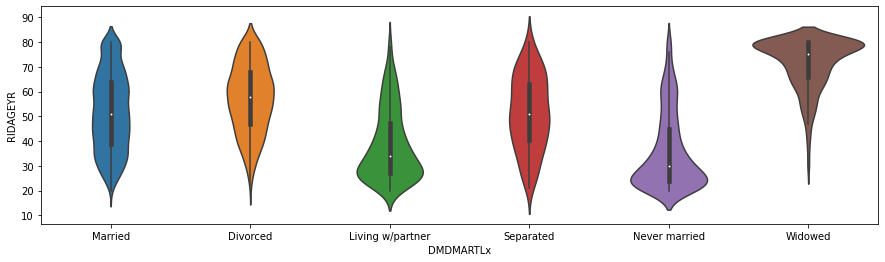

In [62]:
plt.figure(figsize=(15,4))
a = sns.violinplot(db.DMDMARTLx, db.RIDAGEYR)

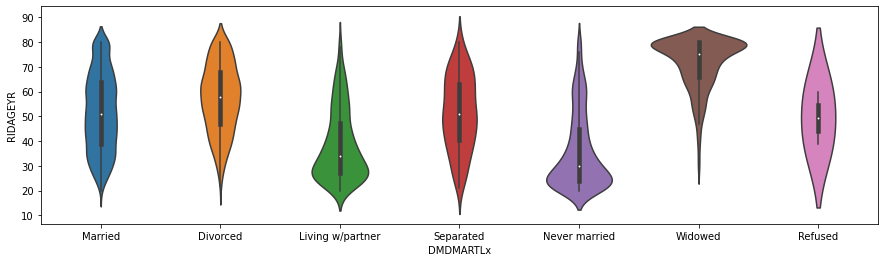

In [63]:
plt.figure(figsize=(15,4))
a = sns.violinplot(data.DMDMARTLx, data.RIDAGEYR)